In [ ]:
#This version no is very crucial for using gpt model "gpt-3.5-turbo-instruct"
!pip install openai==0.28

In [ ]:
#Story generating AI agent
import openai
openai.api_key = ''#paste your key here

def comp(PROMPT, MaxToken, outputs=3):
    response = openai.Completion.create(
        model="gpt-3.5-turbo-instruct",
        prompt=PROMPT,
        max_tokens=MaxToken,
        n=outputs
    )
    output = list()
    for k in response['choices']:
        output.append(k['text'].strip())
    return output

PROMPT = """Write a success story of Generative AI Engineer"""
comp(PROMPT, MaxToken=20, outputs=3)

['John had always been fascinated with artificial intelligence and how it can revolutionize industries through automation and decision',
 'John was a young computer science student who had always been fascinated by artificial intelligence. He was passionate',
 'Kim was always passionate about Artificial Intelligence and its potential to revolutionize the world. After completing a']

pip install openai==0.28

In [ ]:
#Use case 1: Generate a story
PROMPT = """Write a short conversation between client and businessman about a wine bottle purchase.
Client is not happy with the purchase and the businessman is not accepting his mistake.
Make the conversation sarcastic.
Each Response should have atmost 2 lines.
The client should talk like Kevin Hart and businessman should  talk like Shakespeare.
"""
comp(PROMPT, MaxToken=3000, outputs=1)

['Client: "Hey man, I bought this wine bottle from you and it tasted like vinegar. What\'s up with that?"\n\nBusinessman: "Good sir, the wine you have purchased is of the finest quality. Perhaps it is your unrefined palate that cannot appreciate its depth and complexity."\n\nClient: "Woah, woah, woah. Let\'s keep the Shakespearean language to a minimum here. I know vinegar when I taste it."\n\nBusinessman: "My apologies, dear sir. May I suggest pairing the wine with a more suitable meal, like your humble pie for doubting my impeccable taste?"']

In [ ]:
#Use case 2 : Generate a Comic story
PROMPT = """Complete the below conversation between a client and a worker.
Make the conversation have a wholesome plot twist.
Conversation : ###
Client: I want a water bottle.
Worker: I don't have any water botlles.
Client: But I want water bottles.
Worker:
###
"""
comp(PROMPT, MaxToken=3000, outputs=1)

["Worker: I understand, ma'am, but unfortunately, all of our water bottles are sold out.\nClient: Oh, that's such a shame. I really needed one for my hike.\nWorker: Well, how about this reusable water bottle made from biodegradable material? It's better for the environment too.\nClient: Hmm, that sounds great. But I'm afraid it might be too expensive.\nWorker: No worries, ma'am. It's actually on clearance right now. And the best part is, for every bottle sold, we donate a portion of the proceeds to building wells in underprivileged communities.\nClient: Oh my, that's amazing. I'll take two, please.\nWorker: Thank you for supporting our cause. Have a wonderful day!"]

In [ ]:
#Use case 3 : AI agent for translation
PROMPT = """
Translate the below text in Hindi.
Text:###
He is a good Business man.
###
"""
comp(PROMPT, MaxToken=3000, outputs=1)

['वह एक अच्छा व्यापारी है।']

In [ ]:
#Use case 4 : AI agent for Summarization
PROMPT = """
Summarize the below text and extract the key points.
Text:###
This is an extremely popular story about a hare and a tortoise.
The hare is an animal that is known to move quickly, while a tortoise is one to move slowly.
One day, the hare challenged the tortoise to a race simply to prove that he was the best. The tortoise agreed.
Once the race began the hare was easily able to get a head start. Upon realizing that the tortoise is far behind. The overconfident hare decided to take a nap.
Meanwhile the tortoise, who was extremely determined and dedicated to the race was slowly nearing the finish line.
The tortoise won the race while the hare napped. Most importantly he did it with humility and without arrogance.
###
"""
comp(PROMPT, MaxToken=3000, outputs=1)

['This text is a well-known fable about a hare and a tortoise who compete in a race. The hare, known for its speed, challenges the tortoise, who is known for being slow. As the race begins, the hare takes a nap while the tortoise continues to slowly move forward. The tortoise eventually wins the race with determination and humility, proving that slow and steady can also succeed.']

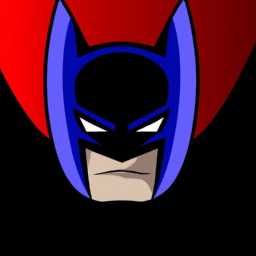

In [ ]:
#Use case 5 : AI agent for Image creation
import requests
from PIL import Image
from io import BytesIO

def generate(text):
  res = openai.Image.create(
    # text describing the generated image
    prompt=text,
    # number of images to generate
    n=1,
    # size of each generated image
    size="256x256",
  )
  # returning the URL of one image as
  # we are generating only one image
  return res["data"][0]["url"]

# prompt describing the desired image
text = "batman art in red and blue color"
# calling the custom function "generate"
# saving the output in "url1"
url1 = generate(text)
# using requests library to get the image in bytes
response = requests.get(url1, stream=True)
# using the Image module from PIL library to view the image
Image.open(response.raw)

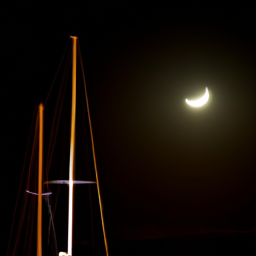

In [19]:
#Use case 6: AI agent for scenic views
# text prompt describing my desired image
text = "a scenic view of moon shining light on a yacht"
# generate function uses DALL-E API to generate image
# it returns a temporary URL of the image
url1 = generate(text)
# We use the requests library to fetch the image from URL
response = requests.get(url1, stream=True)
# We use the Image Class from PIL library to open the image
Image.open(response.raw)

In [ ]:
!pip install openai==0.28

In [ ]:
#Use case 7 : Traditional chat bot using openAI's apikey (No feedback / No memory/ no Context of previous chat)
import openai
import os

openai.api_key = ("")  # Replace with your OpenAI API key

def chatbot():
    # Only have a basic system message to initialize the context
    messages = [{"role": "system", "content": "You are a helpful assistant."}]

    # Keep repeating the following
    while True:
        # Prompt user for input
        message = input("User: ")

        # Exit program if user inputs "quit"
        if message.lower() == "quit":
            break

        # Add the user message to the context
        messages.append({"role": "user", "content": message})

        # Request gpt-3.5-turbo for chat completion with only the current message
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=messages
        )

        # Get the assistant's response
        chat_message = response['choices'][0]['message']['content']
        print(f"Bot: {chat_message}")

        # After each response, clear the history to make it stateless (no memory of previous chats)
        messages = [{"role": "system", "content": "You are a helpful assistant."}]  # Reset history

if __name__ == "__main__":
    print("Start chatting with the bot (type 'quit' to stop)!")
    chatbot()


Start chatting with the bot (type 'quit' to stop)!
User: Who's Jack Daniel?
Bot: Jack Daniel was an American distiller and the founder of the Jack Daniel's Tennessee whiskey distillery. The whiskey produced at the Jack Daniel's distillery is known worldwide and is one of the best-selling whiskey brands in the world.
User: when did it started?
Bot: Could you please provide more context or details to clarify your question? What specifically would you like to know when it started?


KeyboardInterrupt: Interrupted by user

In [ ]:
# Use case 8 : Chat Agent with memory/context of previous conversation.
import openai
import os

openai.api_key = ("")#paste your key here

def chatbot():
  # Create a list to store all the messages for context
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
  ]

  # Keep repeating the following
  while True:
    # Prompt user for input
    message = input("User: ")

    # Exit program if user inputs "quit"
    if message.lower() == "quit":
      break

    # Add each new message to the list
    messages.append({"role": "user", "content": message})

    # Request gpt-3.5-turbo for chat completion
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=messages
    )

    # Print the response and add it to the messages list
    chat_message = response['choices'][0]['message']['content']
    print(f"Bot: {chat_message}")
    messages.append({"role": "assistant", "content": chat_message})

if __name__ == "__main__":
  print("Start chatting with the bot (type 'quit' to stop)!")
  chatbot()

Start chatting with the bot (type 'quit' to stop)!
User: who's mic jagger?
Bot: Mick Jagger is a British musician, singer, and songwriter who is best known as the lead vocalist of the rock band The Rolling Stones. Jagger is considered one of the most influential and iconic frontmen in rock history.
User: what's his DOB?
Bot: Mick Jagger was born on July 26, 1943.
User: quit
